We're going to get a shapefile of suburb boundaries from here:

https://data.gov.au/dataset/ds-dga-91e70237-d9d1-4719-a82f-e71b811154c6/details

In [1]:
import os
import geopandas as gpd
import shapely
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from shapely.geometry import Point
from shapely.geometry import Polygon



shp_file_name = "/Users/stella/1161/star_data/my map/GDA94/vic_localities.shp"
zip_file_name = "vic_land_availability.zip"
web_file_path = (
    "https://discover.data.vic.gov.au/dataset/"
)
filepath = "bars-and-pubs-with-patron-capacity.csv"


In [2]:
if os.path.isfile("bars-and-pubs-with-patron-capacity.csv"):
    filepath = "bars-and-pubs-with-patron-capacity.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")
pub_data = pd.read_csv(filepath,skiprows=1)
print("done")

loading from file
done


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

To get a load of shape files from data.gov.au, more specifically, [here](https://data.gov.au/dataset/nsw-suburb-locality-boundaries-psma-administrative-boundaries/resource/bf8b5180-fcea-44bd-bd76-af14cc4b0fe0)

In [4]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [5]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


#### Shapefiles are the format that a lot of GIS tools use.

#### GIS means Geographic Information System

pronounced: _gee eye ess_

not pronounced: _jizz_

In [6]:
burbs = gpd.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(5)

,Census yea,Block ID,Property I,Base prope,Building a,CLUE small,Trading na,Business a,Number of,Longitude,Latitude,location,geometry
685,2013,85,105746,105746,183-265 La Trobe Street MELBOURNE 3000,Melbourne (CBD),Equinox Bar Restaurant,"Shop 8, Ground , 300 La Trobe Street MELBOURNE...",80,144.962839,-37.810902,"-37.8109017475, 144.96283887087478",POINT (144.963 -37.811)
3598,2010,54,105852,105852,401-405 Little Bourke Street MELBOURNE 3000,Melbourne (CBD),The Apartment Restaurant Club Lounge,"LwrGround , 405 Little Bourke Street MELBOURNE...",250,144.961034,-37.814033,"-37.814032806073016, 144.9610341172",POINT (144.961 -37.814)
2918,2020,67,105677,105677,117-121 Lonsdale Street MELBOURNE VIC 3000,Melbourne (CBD),Golden Nugget,Ground 117 Lonsdale Street MELBOURNE VIC 3000,250,144.968903,-37.810793,"-37.81079279084446, 144.9689026007",POINT (144.969 -37.811)
2881,2020,23,102098,102098,415-417 Collins Street MELBOURNE VIC 3000,Melbourne (CBD),The Sherlock Holmes Inn,Gnd & Bmt 417 Collins Street MELBOURNE VIC 3000,131,144.960868,-37.817469,"-37.81746943542926, 144.96086833885",POINT (144.961 -37.817)
4373,2019,46,109413,109413,146 Swanston Street MELBOURNE 3000,Melbourne (CBD),Cabinet Bar,11 Swanston Street MELBOURNE 3000,90,144.966202,-37.814177,"-37.81417663385, 144.96620165918984",POINT (144.966 -37.814)


There are a bunch of junk columns in there. Normally I'd leave them in, but because we're going to be looking are this data in dataframes, I'll take them out so that it's easier on the eyes.

In [7]:
cols_to_drop = ["VIC_LOCA_1", "VIC_LOCA_3", "VIC_LOCA_4","VIC_LOCA_5","VIC_LOCA_7", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(2)

,Census yea,Block ID,Property I,Base prope,Building a,CLUE small,Trading na,Business a,Number of,Longitude,Latitude,location,geometry
0,2002,11,108972,108972,10-22 Spencer Street MELBOURNE 3000,Melbourne (CBD),Explorers Inn,10-22 Spencer Street MELBOURNE 3000,50,144.955254,-37.820511,"-37.82051068881513, 144.95525416628004",POINT (144.955 -37.821)
1,2002,14,103172,103172,31-39 Elizabeth Street MELBOURNE 3000,Melbourne (CBD),Connells Tavern,35 Elizabeth Street MELBOURNE 3000,350,144.964322,-37.817426,"-37.81742610667125, 144.964321660097",POINT (144.964 -37.817)


Only uncomment this if you've got a fast computer and a lot of time!

It makes the map at the top of this file.

<Axes: >

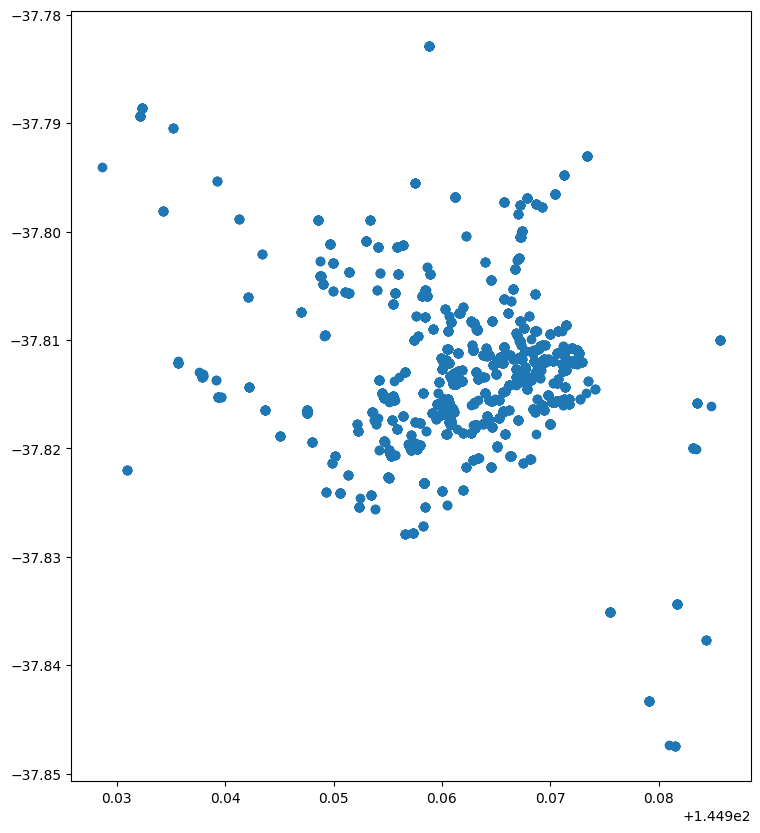

In [8]:
burbs.geometry.plot()

Let's pull out a single row, a single suburb, and look at it.

Census yea                                         2002
Block ID                                             11
Property I                                       108972
Base prope                                       108972
Building a          10-22 Spencer Street MELBOURNE 3000
CLUE small                              Melbourne (CBD)
Trading na                                Explorers Inn
Business a          10-22 Spencer Street MELBOURNE 3000
Number of                                            50
Longitude                                    144.955254
Latitude                                     -37.820511
location         -37.82051068881513, 144.95525416628004
geometry      POINT (144.95525416628 -37.8205106888151)
Name: 0, dtype: object


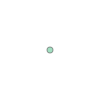

In [69]:
a = burbs.iloc[0]
print(a)
a.geometry

Text(618.6127659228742, 0.5, 'Latitude')

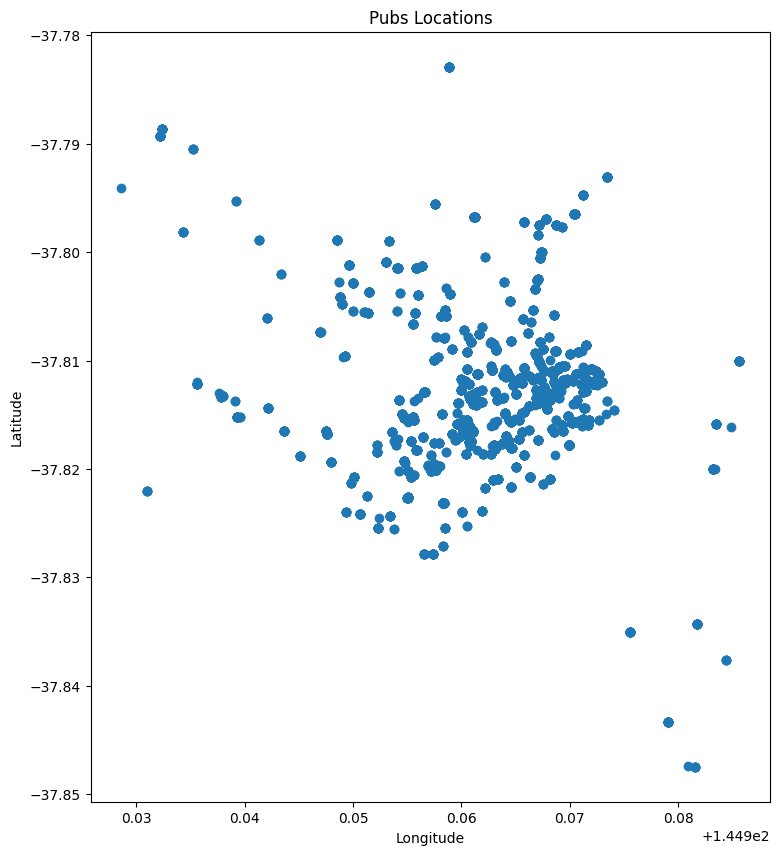

In [64]:
burbs.centroid.plot()
plt.title("Pubs Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")